In [5]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
path = './dataFolder/AffineTransformation/'

In [6]:
MIN_MATCH_COUNT = 10
img1 = cv2.imread(path + 'M3_1/M3_ventHW_full.png',0)          # queryImage
pt1_file = pd.read_csv(path + 'M3_1/Results.csv')
img2 = cv2.imread(path + 'M13_2/m13right_ventHW_full.png',0)   # trainImage
pt2_file = pd.read_csv(path + 'M13_2/Results.csv')

In [7]:
# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)
 
# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
#  (which is not required in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)
 
# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
 
# Match the two sets of descriptors.
matches = matcher.match(d1, d2)
 
# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)
 
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)

In [8]:
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt

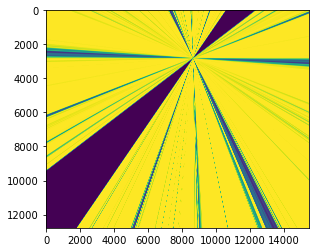

In [12]:
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
 
# Use this matrix to transform the
# colored image wrt the reference image.
height, width = img2.shape
transformed_img = cv2.warpPerspective(img1,
                    homography, (width, height))
 
# Save the output.
plt.imshow(transformed_img)